In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
def folder_evol(g, m, a, N, v, Q, D):
    path = Path(f"./results_fermions_test/{g=:0.4f}/{m=:0.4f}/{N=}/{a=:0.4f}/{v=:0.4f}/{Q=:0.4f}/{D=}/")
    path.mkdir(parents=True, exist_ok=True)
    return path

In [3]:
g = 1 / 5
D0 = 64
ms = [0 * g, 0.1 * g, 0.318 * g, 1 * g]
Nas =  [(100, 1.0), (200, 0.5), (400, 0.25)]

eng, ents1, ents2, ents3 = {}, {}, {}, {}
T00, T11, T01 = {}, {}, {}
j0, j1, nu, Ln = {}, {}, {}, {}

for m in ms:
    for N, a in Nas:
        folder = folder_evol(g, m, a, N, 1, 1, D0)
        eng[m, N] = np.loadtxt(folder / "total_eng.txt", delimiter=";")
        ents1[m, N] = np.loadtxt(folder / "ents1.txt", delimiter=";")
        ents2[m, N] = np.loadtxt(folder / "ents2.txt", delimiter=";")
        ents3[m, N] = np.loadtxt(folder / "ents3.txt", delimiter=";")
        T00[m, N] = np.loadtxt(folder / "T00.txt", delimiter=";")
        T01[m, N] = np.loadtxt(folder / "T01.txt", delimiter=";")
        T11[m, N] = np.loadtxt(folder / "T11.txt", delimiter=";")
        j0[m, N] = np.loadtxt(folder / "j0.txt", delimiter=";")
        j1[m, N] = np.loadtxt(folder / "j1.txt", delimiter=";")
        Ln[m, N] = np.loadtxt(folder / "Ln.txt", delimiter=";")
        nu[m, N] = np.loadtxt(folder / "nu.txt", delimiter=";")


Total energy in time

In [4]:
# test energy
for i, m in enumerate(ms):
    for j, (N, a) in enumerate(Nas):
        x1 = np.sum(T00[m, N][:, 1:], axis=1).ravel() * a
        x2 = eng[m, N][:, 1:].ravel()
        assert np.max(np.abs((np.abs(1 - x1 / x2) ))) < 1e-8


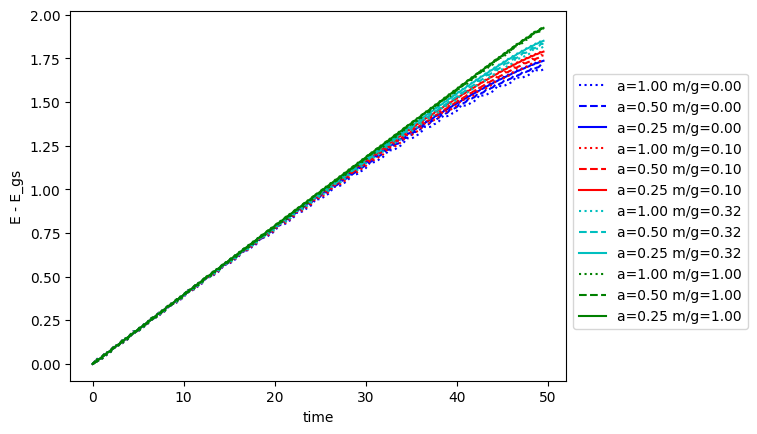

In [5]:
clrs = dict(zip(ms, 'brcg'))
smbs = {100: ':', 200: '--', 400: '-'}

for i, m in enumerate(ms):
    for j, (N, a) in enumerate(Nas):
        ee = eng[m, N][:-4, 1]
        ee = ee - ee[0]
        tm = eng[m, N][:-4, 0]
        plt.plot(tm, ee, smbs[N], color=clrs[m], label=f"{a=:0.2f} {m/g=:0.2f}")
plt.xlabel('time')
plt.ylabel('E - E_gs')
plt.legend(ncols=1, bbox_to_anchor=(1, 0.85))

von Neuman entropy between left and right parts of the lattice; Here, we subtract values in the initial state.  Note the crossover point at m/g = 1/pi

Text(0.43, 1.0, 'von Neuman entropy (above g.s. background)')

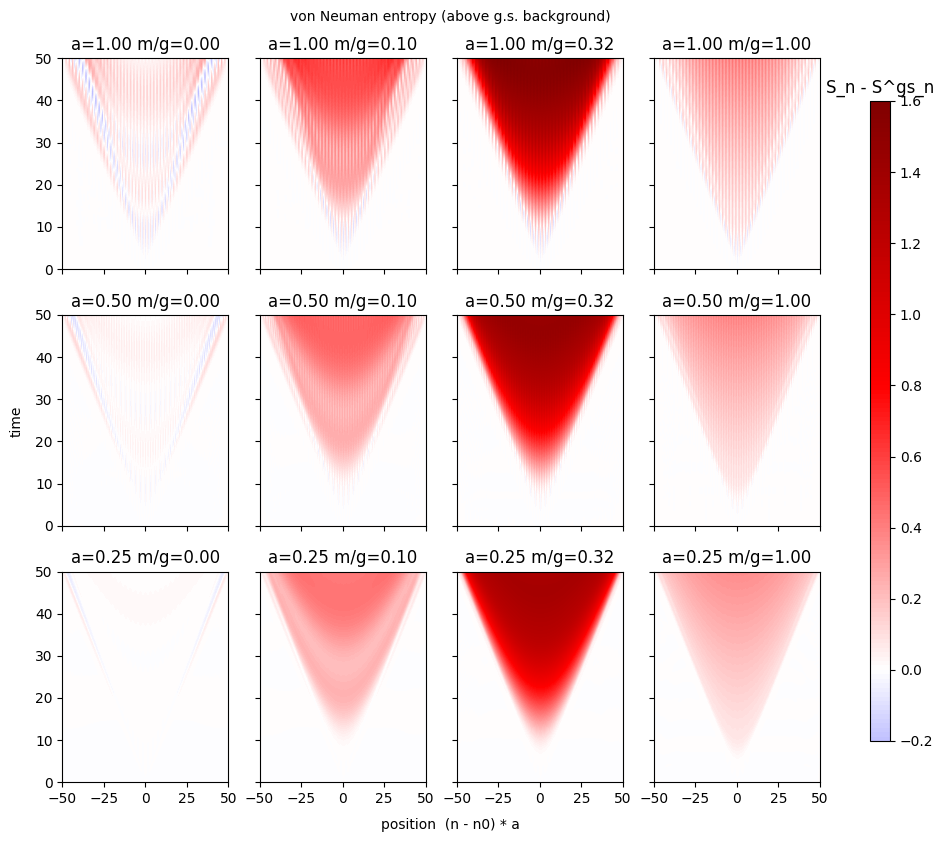

In [6]:
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 8))
for i, m in enumerate(ms):
    for j, (N, a) in enumerate(Nas):

        ee = ents1[m, N][:, 1:]
        ee0 = ee[0, :]
        ee = ee - ee0
        tm = ents1[m, N][:, 0]

        im = ax[j, i].imshow(ee, extent=(-N*a/2, N*a/2, 0, tm[-1]),
                             origin='lower', aspect='auto',
                             vmin=-1.6, vmax=1.6,
                             cmap = cm.seismic)
        ax[j, i].set_title(f"{a=:0.2f} {m/g=:0.2f}")
        ax[j, i].set_xticks([-50, -25, 0, 25, 50])
        ax[j, i].set_ylim([0, 50])
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.10, 0.02, 0.8])
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.set_title('S_n - S^gs_n')
cb.ax.set_ylim([-0.2, 1.6])

fig.text(0.43, -0.01, 'position  (n - n0) * a', ha='center')
fig.text(-0.01, 0.5, 'time', va='center', rotation='vertical')
fig.text(0.43, 1.00, 'von Neuman entropy (above g.s. background)', ha='center')


Entropy (see above) at middle cut n=n0; without subtracting the value at t=0;  The convergence, in particular at late times will have to be checked;  Logarithmic (in a or N) contribution in the initial state is clearly visible.

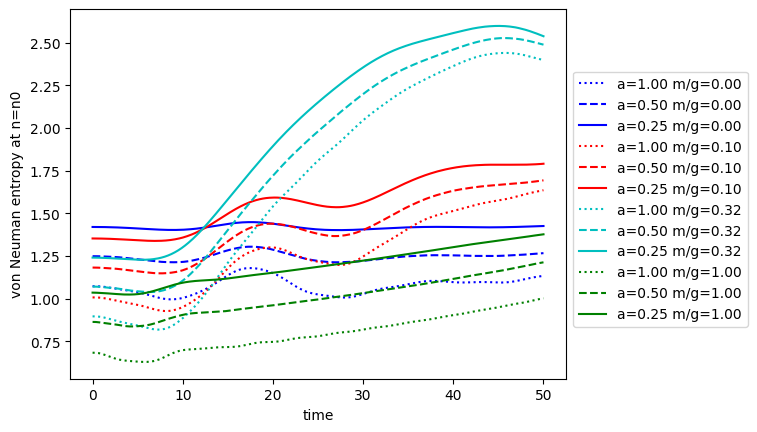

In [7]:
for i, m in enumerate(ms):
    for j, (N, a) in enumerate(Nas):
        ee = ents1[m, N][:, 1:]
        eec = ee[:, N // 2]
        tm = ents1[m, N][:, 0]
        plt.plot(tm, eec, smbs[N], color=clrs[m], label=f"{a=:0.2f} {m/g=:0.2f}")
plt.xlabel('time')
plt.ylabel('von Neuman entropy at n=n0')
plt.legend(ncols=1, bbox_to_anchor=(1, 0.85))

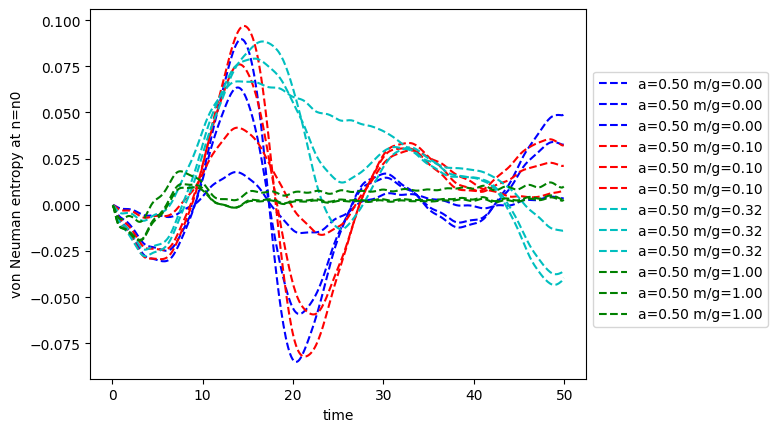

In [8]:
for i, m in enumerate(ms):
    N, a = 200, 0.5
    for ents in [ents1, ents2, ents3]:
        ee = ents[m, N][:, 1:]
        eec = ee[:, N // 2]
        tm = ents[m, N][:, 0]
        deec = (eec[1:] - eec[:-1]) / (tm[1:] - tm[:-1])
        tm = (tm[1:] + tm[:-1]) / 2

        plt.plot(tm, deec, smbs[N], color=clrs[m], label=f"{a=:0.2f} {m/g=:0.2f}")
plt.xlabel('time')
plt.ylabel('von Neuman entropy at n=n0')
plt.legend(ncols=1, bbox_to_anchor=(1, 0.85))

T00; We avarage over [2*l, 2*l+1] sites, and subtract initial value.


Text(0.43, 1.0, 'T00(n) - T00(n, t=0)')

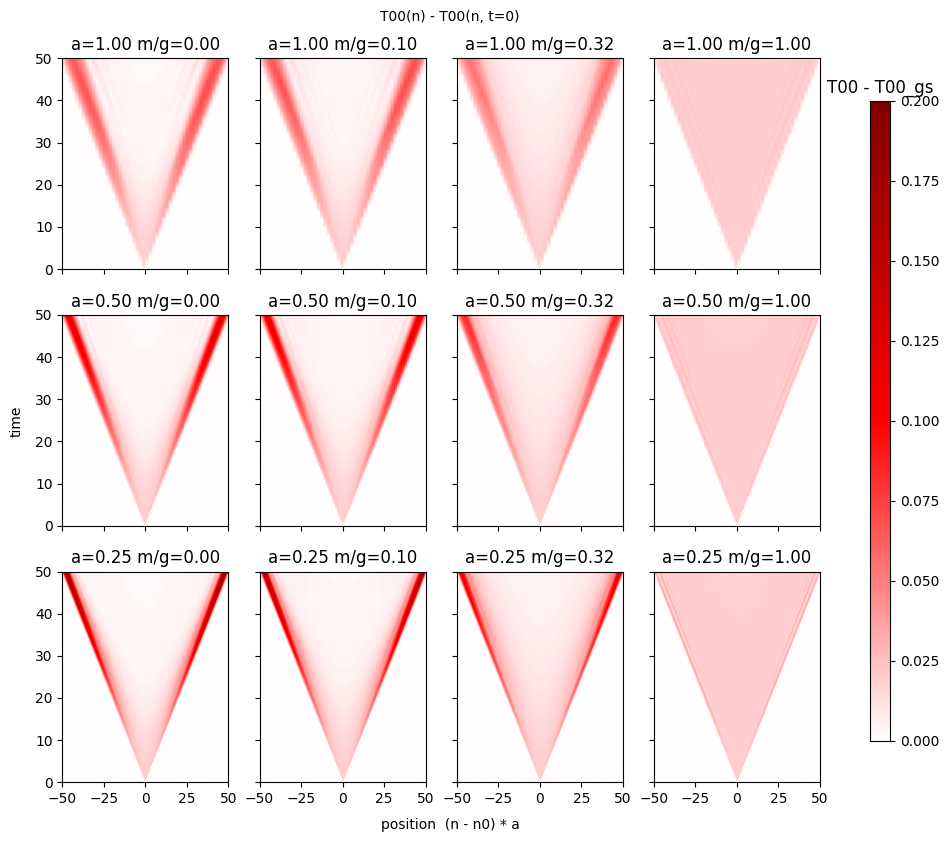

In [9]:
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 8))
for i, m in enumerate(ms):
    for j, (N, a) in enumerate(Nas):

        ee = T00[m, N][:, 1:]
        tm = T00[m, N][:, 0]
        ee = (ee[:, 0::2] + ee[:, 1::2]) /2  #  here we calculate mean of sites 2*l and 2*l+1
        ee0 = ee[0, :]
        ee = ee - ee0

        # print(np.min(ee), np.max(ee))

        im = ax[j, i].imshow(ee, extent=(-N*a/2, N*a/2, 0, tm[-1]),
                             origin='lower', aspect='auto',
                             vmin=-0.2, vmax=0.2,
                             cmap = cm.seismic)
        ax[j, i].set_title(f"{a=:0.2f} {m/g=:0.2f}")
        ax[j, i].set_xticks([-50, -25, 0, 25, 50])
        ax[j, i].set_ylim([0, 50])

fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.10, 0.02, 0.8])
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.set_title('T00 - T00_gs')
cb.ax.set_ylim([0.0, 0.2])

fig.text(0.43, -0.01, 'position  (n - n0) * a', ha='center')
fig.text(-0.01, 0.5, 'time', va='center', rotation='vertical')
fig.text(0.43, 1.00, 'T00(n) - T00(n, t=0)', ha='center')

T11; We avarage over [2*l, 2*l+1] sites, and subtract initial value.

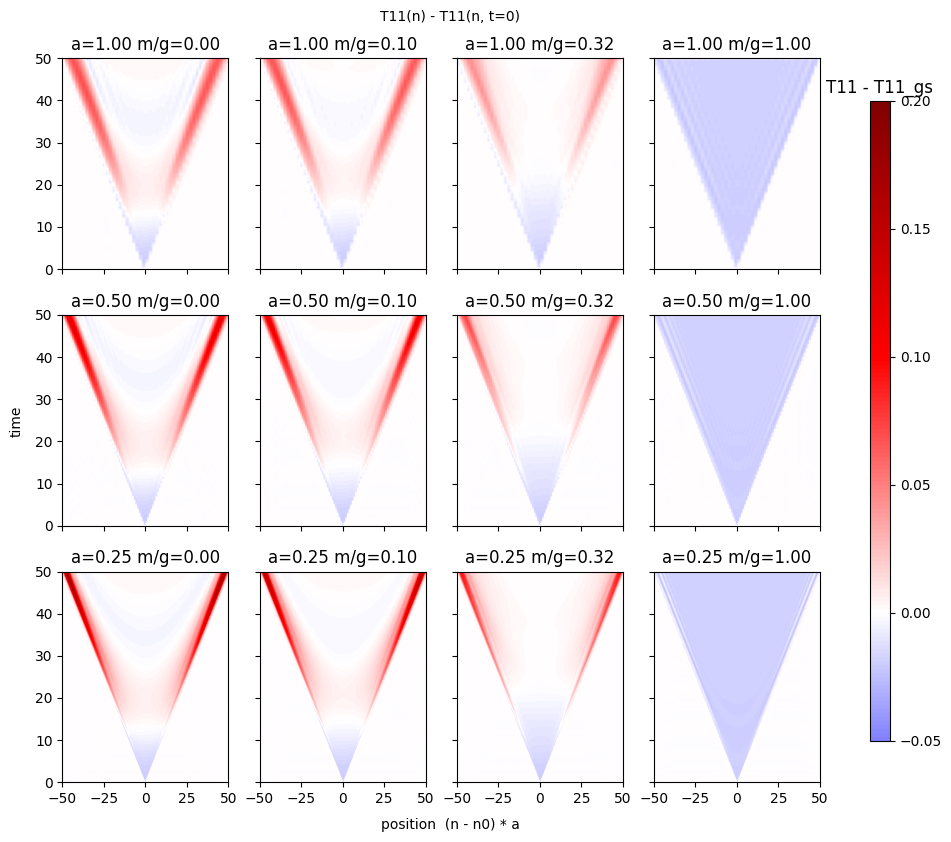

In [10]:
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 8))
for i, m in enumerate(ms):
    for j, (N, a) in enumerate(Nas):

        ee = T11[m, N][:, 1:]
        tm = T11[m, N][:, 0]

        ee = (ee[:, 0::2] + ee[:, 1::2]) / 2  #  here we calculate mean of sites 2*l and 2*l+1
        ee0 = ee[0, :]
        ee = ee - ee0

        # print(np.min(ee), np.max(ee))

        im = ax[j, i].imshow(ee, extent=(-N*a/2, N*a/2, 0, tm[-1]),
                             origin='lower', aspect='auto',
                             vmin=-0.2, vmax=0.2,
                             cmap = cm.seismic)
        ax[j, i].set_title(f"{a=:0.2f} {m/g=:0.2f}")
        ax[j, i].set_xticks([-50, -25, 0, 25, 50])
        ax[j, i].set_ylim([0, 50])
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.10, 0.02, 0.8])
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.set_title('T11 - T11_gs')
cb.ax.set_ylim([-0.05, 0.2])


fig.text(0.43, -0.01, 'position  (n - n0) * a', ha='center')
fig.text(-0.01, 0.5, 'time', va='center', rotation='vertical')
fig.text(0.43, 1.00, 'T11(n) - T11(n, t=0)', ha='center');

T01; We avarage over [2*l, 2*l+1] sites, and subtract initial value.

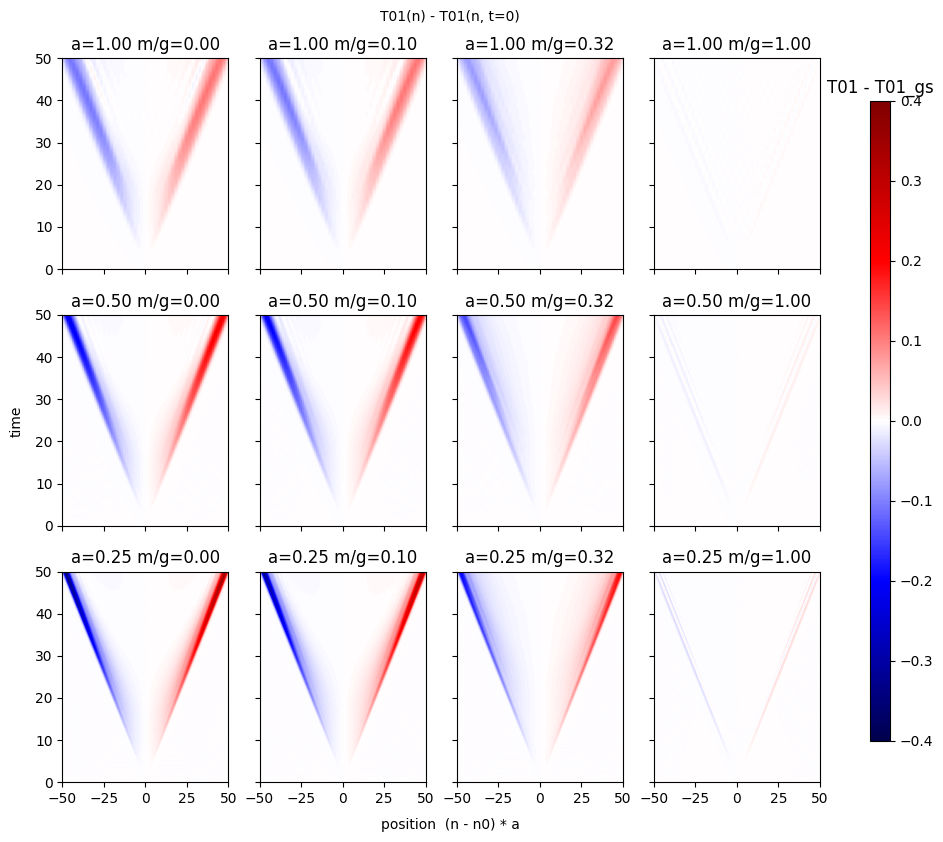

In [11]:
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 8))
for i, m in enumerate(ms):
    for j, (N, a) in enumerate(Nas):

        ee = T01[m, N][:, 1:]
        tm = T01[m, N][:, 0]
        ee = (ee[:, 0::2] + ee[:, 1::2]) /2  #  here we calculate mean of sites 2*l and 2*l+1
        ee0 = ee[0, :]
        ee = (ee - ee0)

        im = ax[j, i].imshow(ee, extent=(-N*a/2, N*a/2, 0, tm[-1]),
                             origin='lower', aspect='auto',
                             vmin=-0.4, vmax=0.4,
                             cmap=cm.seismic)

        ax[j, i].set_title(f"{a=:0.2f} {m/g=:0.2f}")
        ax[j, i].set_xticks([-50, -25, 0, 25, 50])
        ax[j, i].set_ylim([0, 50])
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.10, 0.02, 0.8])
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.set_title('T01 - T01_gs')

fig.text(0.43, -0.01, 'position  (n - n0) * a', ha='center')
fig.text(-0.01, 0.5, 'time', va='center', rotation='vertical')
fig.text(0.43, 1.00, 'T01(n) - T01(n, t=0)', ha='center');

j0; We avarage over [2*l, 2*l+1] sites and subtract initial value.

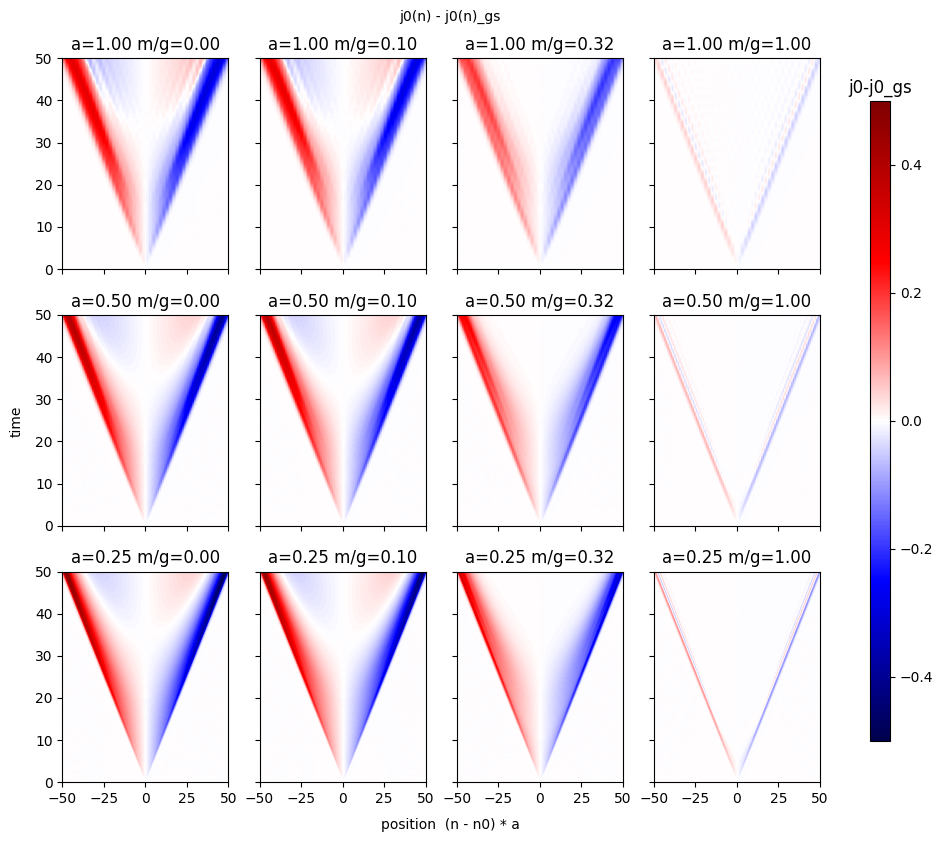

In [12]:
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 8))
for i, m in enumerate(ms):
    for j, (N, a) in enumerate(Nas):

        ee = j0[m, N][:, 1:]
        tm = j0[m, N][:, 0]
        ee0 = ee[0, :]
        ee = ee - ee0

        # print(np.min(ee), np.max(ee))

        im = ax[j, i].imshow(ee, extent=(-N*a/2, N*a/2, 0, tm[-1]),
                             origin='lower', aspect='auto',
                             vmin=-0.5, vmax=0.5,
                             cmap = cm.seismic)
        ax[j, i].set_title(f"{a=:0.2f} {m/g=:0.2f}")
        ax[j, i].set_xticks([-50, -25, 0, 25, 50])
        ax[j, i].set_ylim([0, 50])
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.10, 0.02, 0.8])
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.set_title('j0-j0_gs')

fig.text(0.43, -0.01, 'position  (n - n0) * a', ha='center')
fig.text(-0.01, 0.5, 'time', va='center', rotation='vertical')
fig.text(0.43, 1.00, 'j0(n) - j0(n)_gs', ha='center');

j1; Defined between [2*l, 2*l+1] sites, so no extra avaraging; We subtract initial value.

Text(0.43, 1.0, 'j1(n) - j1(n)_gs')

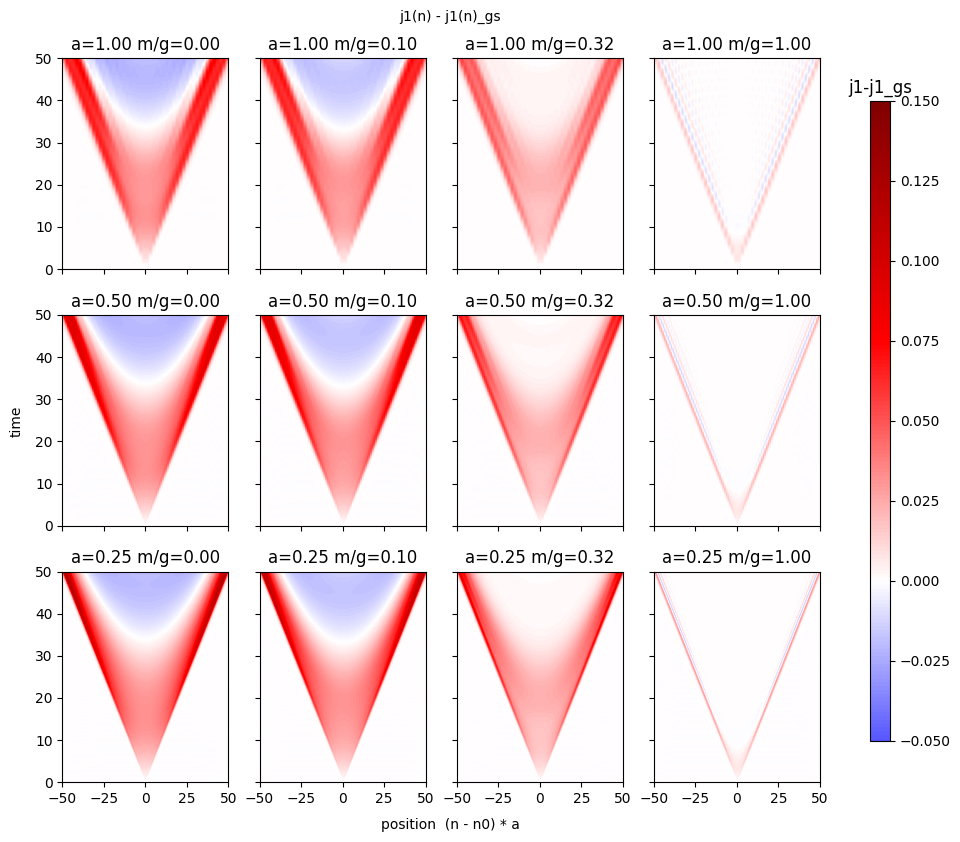

In [13]:
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 8))
for i, m in enumerate(ms):
    for j, (N, a) in enumerate(Nas):

        ee = j1[m, N][:, 1:]
        tm = j1[m, N][:, 0]
        ee0 = ee[0, :]
        ee = -(ee - ee0)/4

        im = ax[j, i].imshow(ee, extent=(-N*a/2, N*a/2, 0, tm[-1]),
                             origin='lower', aspect='auto',
                             vmin=-0.15, vmax=0.15,
                             cmap = cm.seismic)
        ax[j, i].set_title(f"{a=:0.2f} {m/g=:0.2f}")
        ax[j, i].set_xticks([-50, -25, 0, 25, 50])
        ax[j, i].set_ylim([0, 50])
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.10, 0.02, 0.8])
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.set_title('j1-j1_gs')
cb.ax.set_ylim([-0.05, 0.15])


fig.text(0.43, -0.01, 'position  (n - n0) * a', ha='center')
fig.text(-0.01, 0.5, 'time', va='center', rotation='vertical')
fig.text(0.43, 1.00, 'j1(n) - j1(n)_gs', ha='center')

Ln; avarage over [2*l, 2*l+1] sites.

Text(0.43, 1.0, 'L(n)')

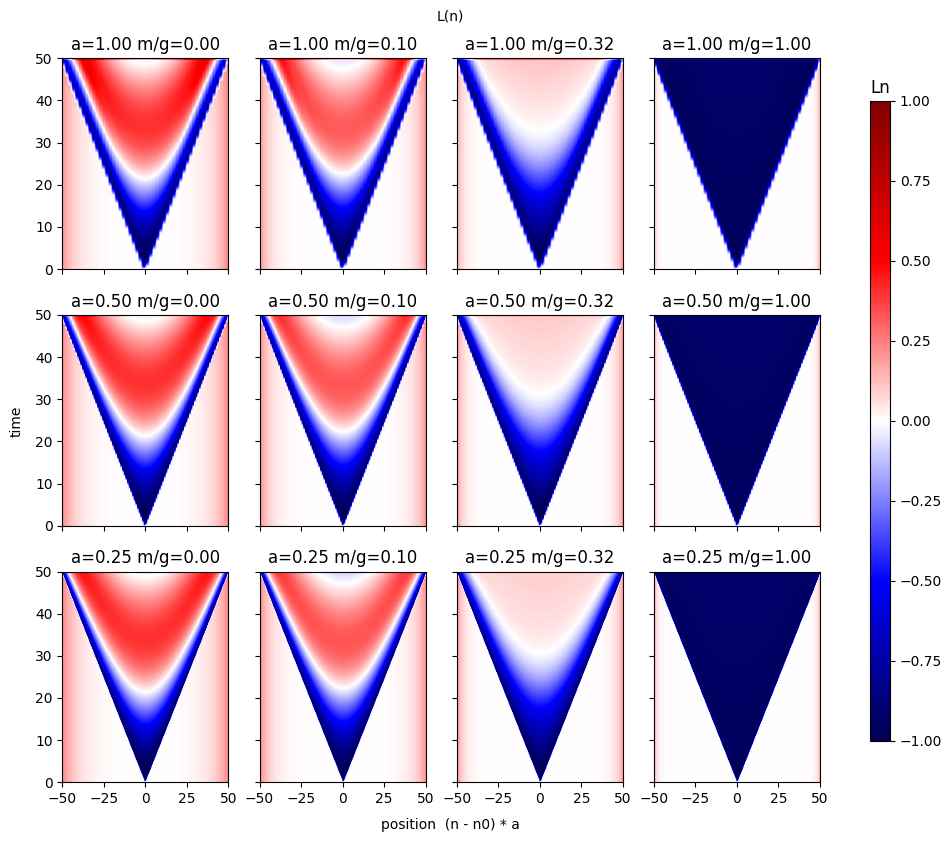

In [14]:
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 8))
for i, m in enumerate(ms):
    for j, (N, a) in enumerate(Nas):

        ee = Ln[m, N][:, 1:]
        tm = Ln[m, N][:, 0]
        ee = (ee[:, 0::2] + ee[:, 1::2]) /2  #  here we calculate mean of sites 2*l and 2*l+1
        # ee0 = ee[0, :]
        # ee = ee - ee0

        # print(np.min(ee), np.max(ee))

        im = ax[j, i].imshow(ee, extent=(-N*a/2, N*a/2, 0, tm[-1]),
                             origin='lower', aspect='auto',
                             vmin=-1, vmax=1,
                             cmap = cm.seismic)

        ax[j, i].set_title(f"{a=:0.2f} {m/g=:0.2f}")
        ax[j, i].set_xticks([-50, -25, 0, 25, 50])
        ax[j, i].set_ylim([0, 50])
        # ax[j, i].set_xlabel("position")
        # ax[j, i].set_ylabel("time")
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.10, 0.02, 0.8])
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.set_title('Ln')

fig.text(0.43, -0.01, 'position  (n - n0) * a', ha='center')
fig.text(-0.01, 0.5, 'time', va='center', rotation='vertical')
fig.text(0.43, 1.00, 'L(n)', ha='center')

Text(0.43, 1.0, 'condensate density (subtract t=0)')

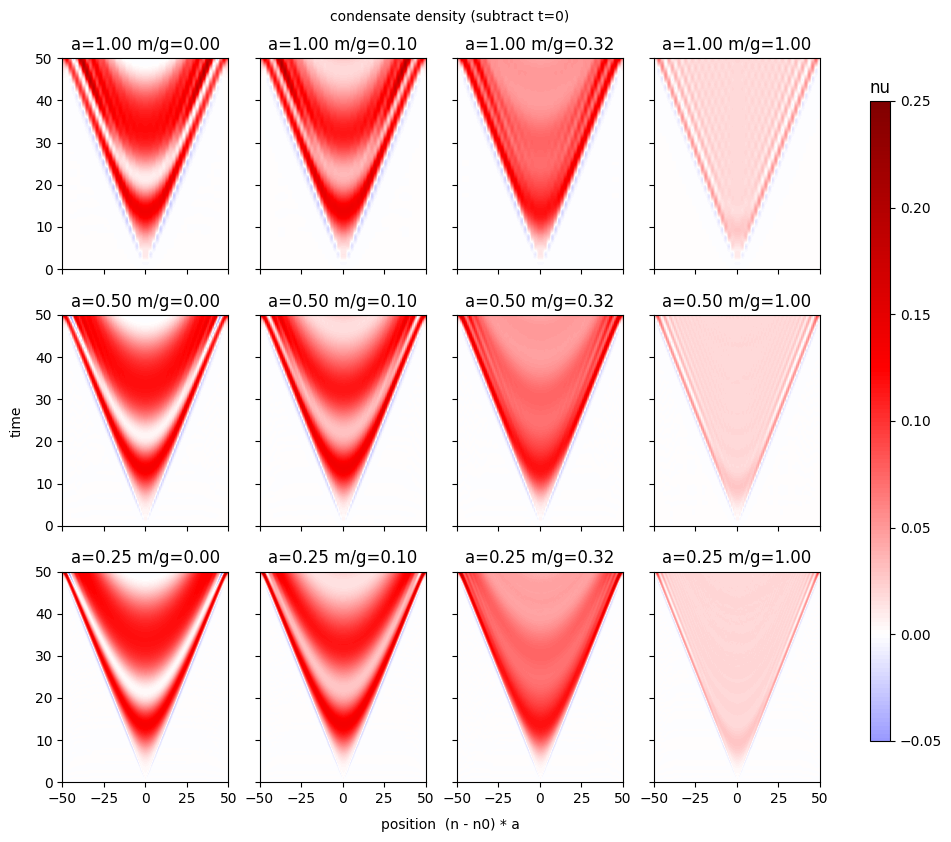

: 

In [ ]:
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 8))
for i, m in enumerate(ms):
    for j, (N, a) in enumerate(Nas):

        ee = nu[m, N][:, 1:]
        tm = nu[m, N][:, 0]
        ee0 = ee[0, :]
        ee = ee - ee0

        im = ax[j, i].imshow(ee, extent=(-N*a/2, N*a/2, 0, tm[-1]),
                             origin='lower', aspect='auto',
                             vmin=-0.25, vmax=0.25,
                             cmap = cm.seismic)
        ax[j, i].set_title(f"{a=:0.2f} {m/g=:0.2f}")
        ax[j, i].set_xticks([-50, -25, 0, 25, 50])
        ax[j, i].set_ylim([0, 50])
        # ax[j, i].set_xlabel("position")
        # ax[j, i].set_ylabel("time")
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.10, 0.02, 0.8])
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.set_title('nu')
cb.ax.set_ylim([-0.05, 0.25])

fig.text(0.43, -0.01, 'position  (n - n0) * a', ha='center')
fig.text(-0.01, 0.5, 'time', va='center', rotation='vertical')
fig.text(0.43, 1.00, 'condensate density (subtract t=0)', ha='center')